# Kaggle House Prices - Lasso Regression
## Libraries

In [133]:
# Data
import pandas as pd
import numpy as np
import statistics
from IPython.display import display
pd.options.display.max_columns = None

# ML
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.5, style="ticks")
fs = (14, 6) # make the figure wider than the default

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [5]:
houses = pd.read_csv('data/cleaned_data/clean_train2.csv')
houses.shape

(1460, 81)

## Clean the training data

In [6]:
# Function for data cleaning
def cleanme(houses):
    # Override spurious NAs
    # PoolQu
    houses.PoolQC.fillna("NA", inplace=True)

    #MiscFeature
    houses.MiscFeature.fillna("NA", inplace=True)

    #Alley
    houses.Alley.fillna("NA", inplace=True)

    # Fence
    houses.Fence.fillna("NA", inplace=True)

    # FireplaceQu
    houses.FireplaceQu.fillna("NA", inplace=True)

    # Garages
    houses.GarageType.fillna("NA",inplace=True)
    houses.GarageFinish.fillna("NA",inplace=True)
    houses.GarageQual.fillna("NA",inplace=True)
    houses.GarageCond.fillna("NA",inplace=True)
    houses.GarageCars.fillna(0, inplace=True)
    houses.GarageArea.fillna(0, inplace=True)

    # Basements
    houses.BsmtExposure.fillna("NA",inplace=True)
    houses.BsmtFinType1.fillna("NA",inplace=True)
    houses.BsmtFinType2.fillna("NA",inplace=True)
    houses.BsmtQual.fillna("NA",inplace=True)
    houses.BsmtCond.fillna("NA",inplace=True)
    houses.BsmtFullBath.fillna(0,inplace=True)
    houses.BsmtFinSF1.fillna(0,inplace=True)
    houses.BsmtFinSF2.fillna(0,inplace=True)
    houses.BsmtUnfSF.fillna(0,inplace=True)
    houses.BsmtHalfBath.fillna(0,inplace=True)
    houses.TotalBsmtSF.fillna(0,inplace=True)

    # Masonry
    houses.MasVnrType.fillna("NA",inplace=True)
    houses.MasVnrArea.fillna(0,inplace=True)

    # KitchenQual
    houses.KitchenQual.fillna("TA",inplace=True)

    # Utilities
    houses.Utilities.fillna("AllPub",inplace=True)

    #Functional
    houses.Functional.fillna("Typ",inplace=True)

    #Exterior Siding
    houses.Exterior1st.fillna("VinylSd", inplace=True)
    houses.Exterior2nd.fillna("VinylSd", inplace=True)

    # Zoning
    houses.MSZoning.fillna("RL",inplace=True)

    # Sale Type
    houses.SaleType.fillna("WD",inplace=True)

    # Electrical
    houses.Electrical.fillna("SRbkr", inplace=True)
    
    # Change some strings to ordinal values
    # ExterQual
    exterqual = {"Po" : 0, "Fa": 1, 'TA':2, 'Gd':3, 'Ex':4}
    houses.ExterQual = houses.ExterQual.apply(lambda v: exterqual[v])
    # ExterCond
    extercond = {"Po" : 0, "Fa": 1, 'TA':2, 'Gd':3, 'Ex':4}
    houses.ExterCond = houses.ExterCond.apply(lambda v: extercond[v])
    # BsmtQual
    basmtqual = {"NA":0, "Po" : 1, "Fa": 2, 'TA':3, 'Gd':4, 'Ex':5}
    houses.BsmtQual = houses.BsmtQual.apply(lambda v: basmtqual[v])
    # BsmtCond
    basmtcond = {"NA":0, "Po" : 1, "Fa": 2, 'TA':3, 'Gd':4, 'Ex':5}
    houses.BsmtCond = houses.BsmtCond.apply(lambda v: basmtcond[v])
    # BsmtExposure
    basmtexposure = {"NA" : 0, "No": 1, 'Mn':2, 'Av':3, 'Gd': 4}
    houses.BsmtExposure = houses.BsmtExposure.apply(lambda v: basmtexposure[v])
    # BsmtFinType_1
    bsmtfintype = {"NA":0, "Unf" : 1, "LwQ": 2, 'Rec':3, 'BLQ':4, 'ALQ':5, "GLQ": 6}
    houses.BsmtFinType1 = houses.BsmtFinType1.apply(lambda v: bsmtfintype[v])
    # KitchenQual
    kitqual = {'Fa':0,'TA':1,'Gd':2, 'Ex':3}
    houses.KitchenQual = houses.KitchenQual.apply(lambda v: kitqual[v])
    # Functional
    functional = {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0}
    houses.Functional = houses.Functional.apply(lambda v: functional[v])
    # FireplaceQu
    fireplacequ = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
    houses.FireplaceQu = houses.FireplaceQu.apply(lambda v: fireplacequ[v])
    # GarageFinish
    garagefinish = {'NA':0,'Unf':1,'RFn':2,'Fin':3}
    houses.GarageFinish = houses.GarageFinish.apply(lambda v: garagefinish[v])

In [7]:
cleanme(houses)

## Load and clean the test data

In [8]:
test_houses = pd.read_csv('data/cleaned_data/clean_test.csv')
test_houses.shape
cleanme(test_houses)

# Train Lasso

In [126]:
def get_err(length,predicted,truth):
    # Mean absolute error
    abs_err = [0] * length
    for i in range(0,length):
            abs_err[i] = abs(predicted[i] - truth[i])

    mae = statistics.mean(abs_err)
    print("Mean Absolute Error:",round(mae,2))

    # Mean abs percent error
    pct_err = [0] * length
    for i in range(0,length):
        pct_err[i] = abs_err[i] / truth[i] * 100
    mpae = statistics.mean(pct_err)

    print("Mean Abs Pct Error:",round(mpae,2),"%")

    accuracy = 100 - mpae
    print('Accuracy:', round(accuracy, 2), '%.')

    # Mean Square Error
    err_sq = [0] * length
    for i in range(0,length):
        err_sq[i] = abs_err[i]**2

    print("Mean Square Error: ",statistics.mean(err_sq))

In [12]:
X = houses.drop('GarageYrBlt', axis=1).drop('SalePrice', axis=1).drop('Id',axis=1) # features (drop ID and GarageYrBlt)
X = pd.get_dummies(X, drop_first=True, dummy_na=True)                              # encoded features
y = houses.SalePrice                                                               # response variable

# 80% train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [110]:
# Train Lasso
alphas = 10**np.linspace(10,-2,100)*0.5
scores = np.empty_like(alphas)
cos = []
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    cos.append(lasso.coef_)

In [111]:
alphadf = pd.DataFrame({"alpha":alphas, "score":scores})
alphadf[alphadf.score==max(alphadf.score)]

,alpha,score
98,1010.110909,0.663727


In [112]:
lassocv = linear_model.LassoCV(alphas = alphas, random_state=0)
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_

In [113]:
print("alpha: ",lassocv_alpha)
print("R**2:",lassocv_score)

alpha:  1010.1109090909013
R**2: 0.8317532641952724


In [114]:
coeff = pd.DataFrame({"feature":X.columns,"coeff":lassocv.coef_})

In [123]:
print(coeff[coeff.coeff>0].shape)
coeff[coeff.coeff>0]

(29, 2)


,feature,coeff
2,LotArea,0.381858
3,OverallQual,13200.139990
4,OverallCond,2430.125819
5,YearBuilt,236.016922
6,YearRemodAdd,126.275023
7,MasVnrArea,32.434175
8,ExterQual,8492.896990
10,BsmtQual,2454.116396
12,BsmtExposure,5350.314815
13,BsmtFinType1,1089.825216


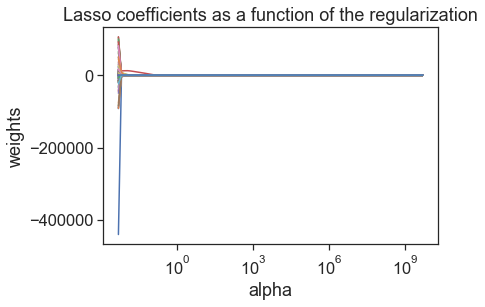

In [144]:
# plt.figure(figsize=(10,4))
ax = plt.gca()

ax.plot(alphas, cos)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [146]:
pred = lassocv.predict(X_test)
y_test = [i for i in y_test]
get_err(len(pred),pred,y_test)

Mean Absolute Error: 21187.06
Mean Abs Pct Error: 12.34 %
Accuracy: 87.66 %.
Mean Square Error:  1834305503.3517718
